In [99]:
# Descriptions Analysis

from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mean



# Get Vocab Stats

In [92]:
def get_vocab_stats(counter, n_words, bar_color, pi_colors, data_type, data_title):
    '''
    Parameters:
    -------------
    counter: Counter collection of corpus
    n_words: number of words to display
    bar_color: (str) color of the bars, plz use tab: colors
    pi_colors: list of colors for pi, use tab: colors
    data_type: what to call it for path name etc., use low caps
    data_title: the title of the dang thing
    -------------
    Returns:
    -------------
    NOTHING, just spits out viz
    -------------
    '''
    wc = list(counter.values())

    words = list(counter.keys())

    print('Total unique words', len(counter))
    print('Total words in corpus:', sum(wc), end='\n\n\n\n')

    n = []

    n_labels = []

    sorted_word_val = [pair[1] for pair in counter.most_common()]


    for pair in counter.most_common(n_words):
        n_labels.append(pair[0])
        n.append(pair[1])

    print('labels', n_labels)
    print('counts', n)

    print(len(n))
    print(len(n_labels))

    print(n_labels)
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:

    y_pos = np.arange(len(n))
    plt.figure(figsize=(18, 18))
    plt.bar(y_pos, n, align='center', alpha=0.5, color=bar_color)
    plt.xticks(y_pos, n_labels, rotation=90)
    plt.ylabel('Count')
    
    bar_title = data_title + ' - Top ' + str(n_words) + ' Words'
    plt.title(bar_title)
    
    bar_file_name = data_type + '-' + str(n_words) + '-bar.png'
    plt.savefig('results_figures/corpus_analysis/' + bar_file_name)
    
    plt.show()

    common_word = counter.most_common()

    n_sum = sum(sorted_word_val[:n_words])
    rest_sum = sum(sorted_word_val[n_words:])
    
    # get the slice of top n words vs rest
    fig1, ax1 = plt.subplots(figsize=(14, 14))

    sums = [n_sum, rest_sum]
    
    n_word_label = 'Top ' + str(n_words) + ' Words'
    
    labels = [ n_word_label, 'Rest of Corpus']
    ax1.pie(sums, labels=labels, colors=pi_colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.rcParams['font.size'] = 14.0
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    pi_file_name = data_type + '-' + str(n_words) + '-pi.png'
    plt.savefig('results_figures/corpus_analysis/' + pi_file_name)
    plt.show()

# Description Stats

Most common words in description: [('survey', 880), ('study', 511), ('questions', 455), ('answer', 369), ('minutes', 335), ('asked', 298), ('complete', 275), ('short', 271), ('opinion', 256), ('give', 243), ('read', 176), ('people', 158), ('task', 155), ('minute', 144), ('research', 130), ('page', 127), ('images', 126), ('series', 123), ('hit', 121), ('shown', 114), ('participate', 114), ('information', 99), ('click', 95), ('write', 92), ('make', 88), ('box', 88), ('opinions', 85), ('social', 85), ('part', 81), ('unique', 80)]
Average length of Description: 69
Total unique words 4229
Total words in corpus: 23767



labels ['survey', 'study', 'questions', 'answer', 'minutes', 'asked', 'complete', 'short', 'opinion', 'give', 'read', 'people', 'task', 'minute', 'research', 'page', 'images', 'series', 'hit', 'shown', 'participate', 'information', 'click', 'write', 'make', 'box', 'opinions', 'social', 'part', 'unique', 'online', 'rate', 'extract', 'experience', 'text', 'min', 'links', 'web'

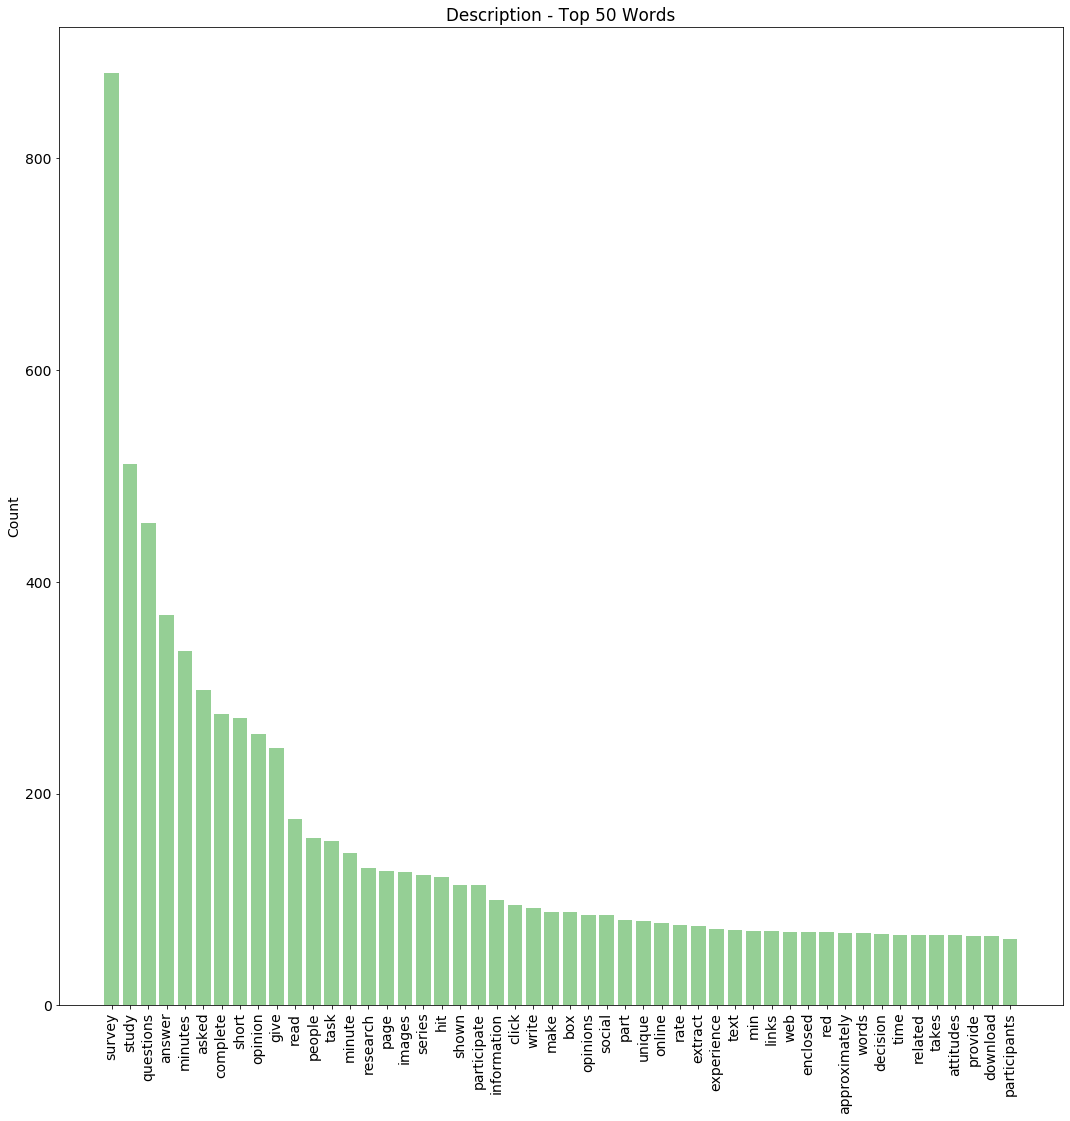

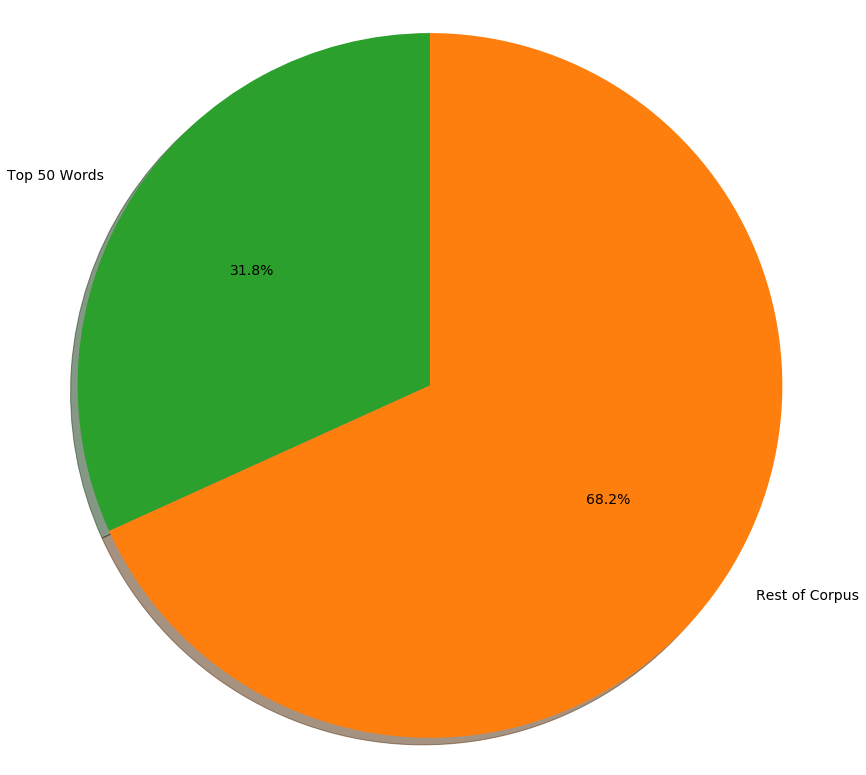

In [100]:
with open('datasets/parsed_full_descriptions.txt') as f:
    corp = f.read()
    corp = corp.replace('\"', '')
    corp = corp.split()
    counter = Counter(corp)
    
print('Most common words in description:', counter.most_common(30))

with open('datasets/parsed_full_descriptions.txt') as f:
    doc_length = [len(line) for line in f.readlines()]
    print('Average length of Description:', math.floor(mean(doc_length)))
    
get_vocab_stats(
    counter,
    50,
    'tab:green',
    ['tab:green', 'tab:orange'],
    'description',
    'Description'
)

# Title Stats

Most common words in title: [('survey', 956), ('minutes', 849), ('answer', 391), ('study', 230), ('short', 224), ('hit', 151), ('image', 145), ('minute', 127), ('compensation', 101), ('opinions', 100), ('min', 100), ('question', 96), ('questions', 89), ('consumer', 84), ('social', 77), ('tagging', 76), ('article', 73), ('clickable', 73), ('decision', 70), ('research', 70), ('attitudes', 67), ('test', 62), ('website', 61), ('task', 60), ('making', 59), ('online', 58), ('based', 57), ('product', 56), ('find', 53), ('perceptions', 53)]
Average length of Title: 38
Total unique words 3337
Total words in corpus: 14584



labels ['survey', 'minutes', 'answer', 'study', 'short', 'hit', 'image', 'minute', 'compensation', 'opinions', 'min', 'question', 'questions', 'consumer', 'social', 'tagging', 'article', 'clickable', 'decision', 'research', 'attitudes', 'test', 'website', 'task', 'making', 'online', 'based', 'product', 'find', 'perceptions', 'behavior', 'experiences', 'experience', 'opinion'

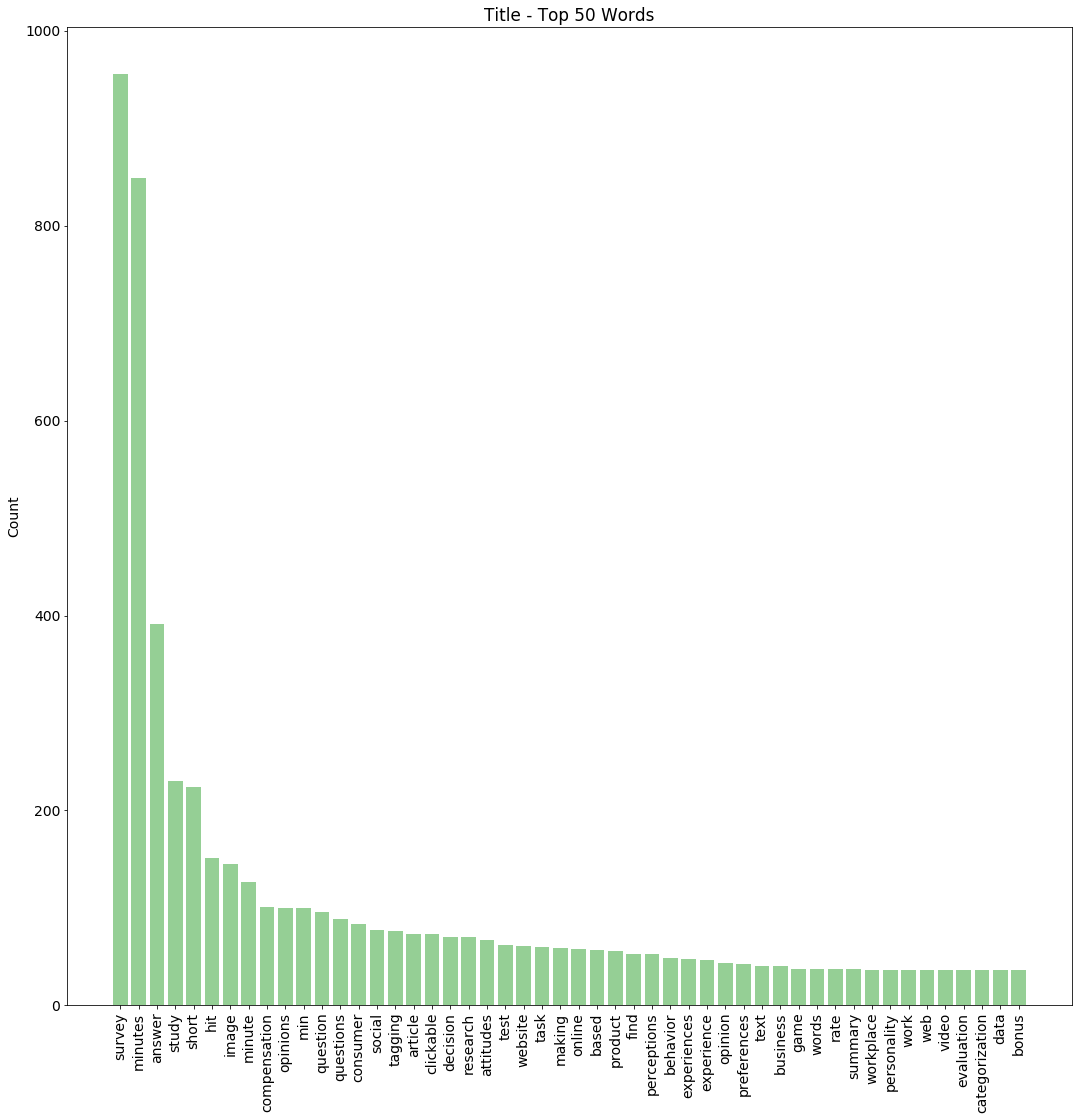

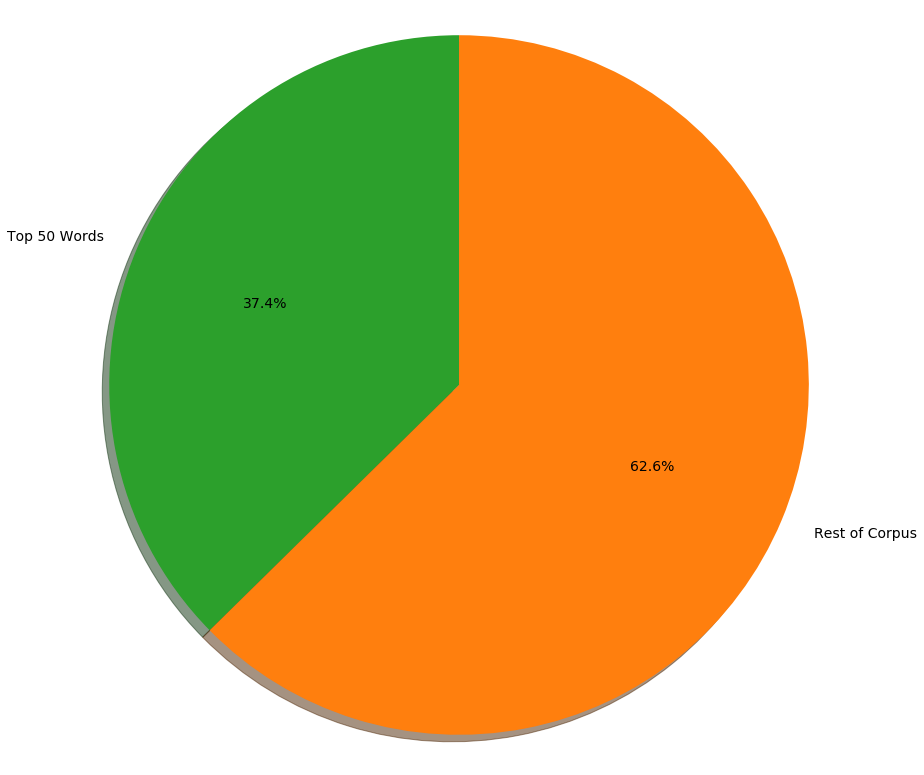

In [102]:
with open('datasets/parsed_full_titles.txt') as f:
    corp = f.read()
    corp = corp.replace('\"', '')
    corp = corp.split()
    counter = Counter(corp)
    
print('Most common words in title:', counter.most_common(30))

with open('datasets/parsed_full_titles.txt') as f:
    doc_length = [len(line) for line in f.readlines()]
    print('Average length of Title:', math.floor(mean(doc_length)))

get_vocab_stats(
    counter,
    50,
    'tab:green',
    ['tab:green', 'tab:orange'],
    'title',
    'Title'
)

# Preview Small Half Corpus Stats

Most common words in preview: [('sentence', 9038), ('answer', 7135), ('original', 5475), ('receipt', 5121), ('hit', 3627), ('text', 3144), ('brand', 2933), ('note', 2798), ('product', 2797), ('data', 2671), ('casing', 2656), ('copy', 2618), ('edit', 2590), ('instructions', 2576), ('spelling', 2563), ('answers', 2395), ('kiwi', 2372), ('hair', 2351), ('botanicals', 2302), ('number', 2281), ('company', 2219), ('shower', 2176), ('scent', 2165), ('make', 2152), ('gel', 2147), ('work', 2062), ('profile', 2048), ('item', 2045), ('proper', 2005), ('info', 1983)]
Average length of Preview: 2349
Total unique words 22016
Total words in corpus: 518817



labels ['sentence', 'answer', 'original', 'receipt', 'hit', 'text', 'brand', 'note', 'product', 'data', 'casing', 'copy', 'edit', 'instructions', 'spelling', 'answers', 'kiwi', 'hair', 'botanicals', 'number', 'company', 'shower', 'scent', 'make', 'gel', 'work', 'profile', 'item', 'proper', 'info', 'question', 'blank', 'edited', 'click', 'select',

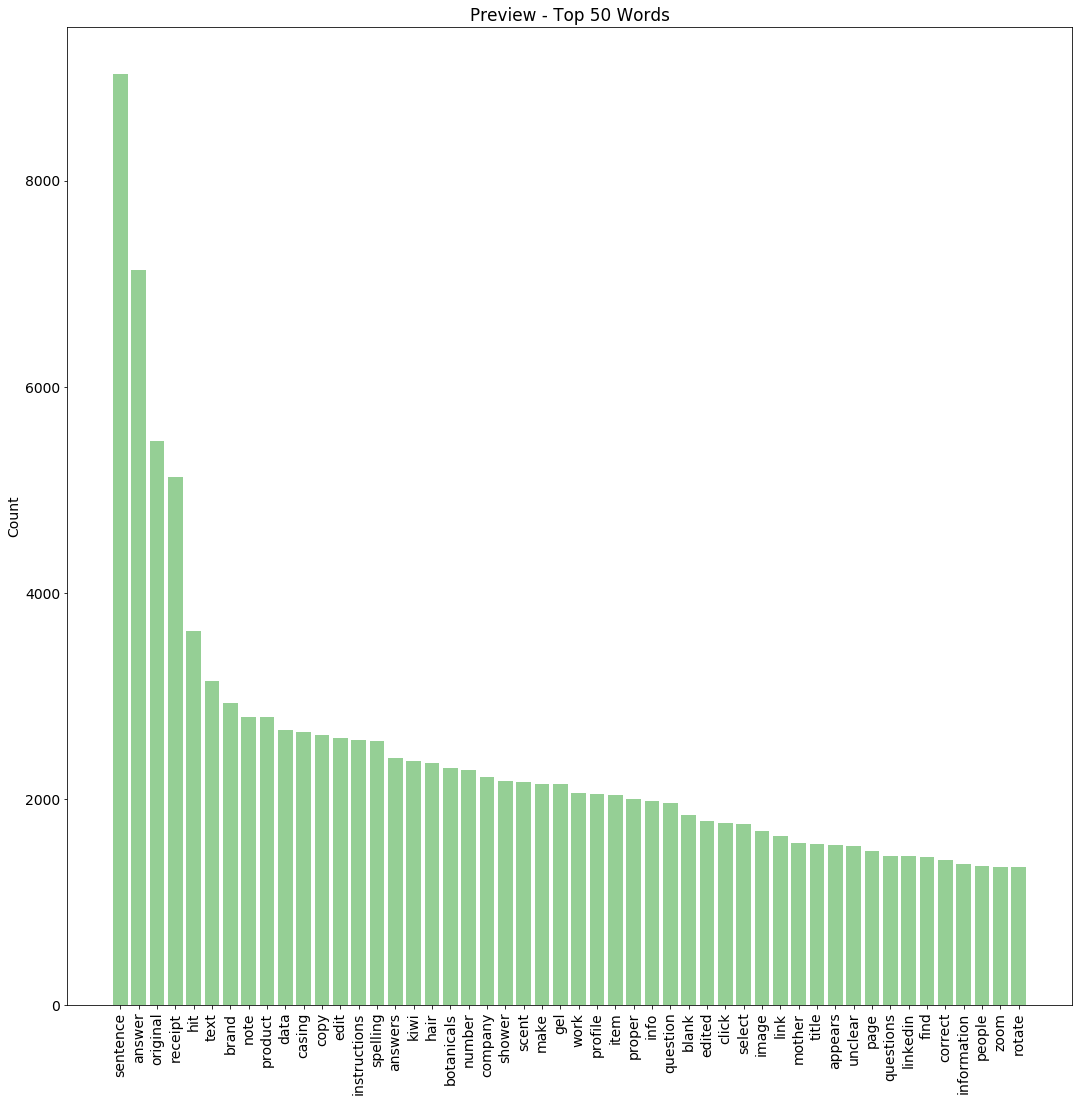

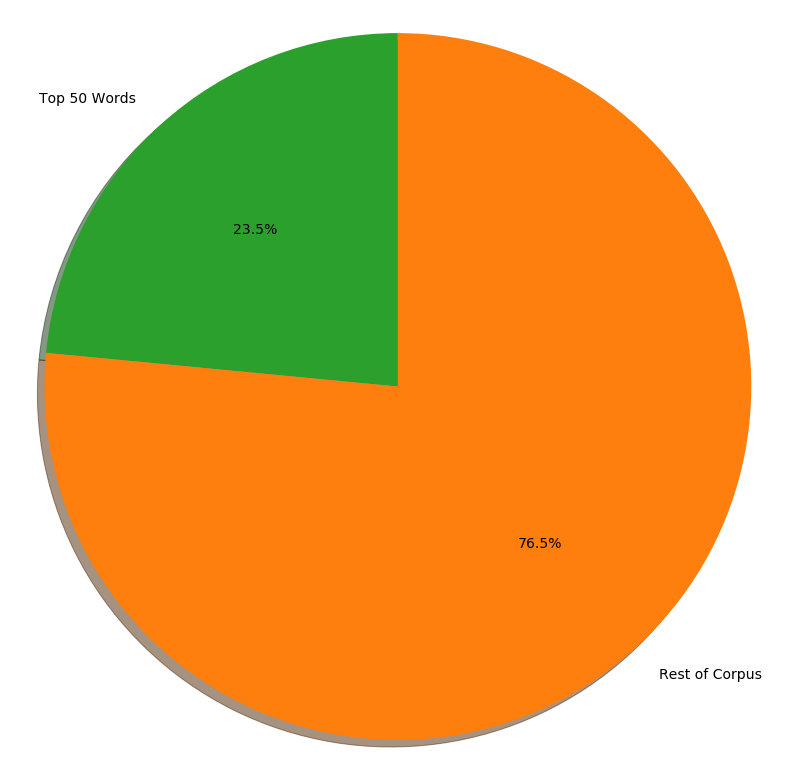

In [103]:
with open('datasets/parsed_small_half_previews.txt') as f:
    corp = f.read()
    corp = corp.replace('\"', '')
    corp = corp.split()
    counter = Counter(corp)
    
print('Most common words in preview:', counter.most_common(30))
with open('datasets/parsed_small_half_previews.txt') as f:
    doc_length = [len(line) for line in f.readlines()]
    print('Average length of Preview:', math.floor(mean(doc_length)))
    
get_vocab_stats(
    counter,
    50,
    'tab:green',
    ['tab:green', 'tab:orange'],
    'preview',
    'Preview'
)